# Introduction

This study is about performing exploratory data analysis on Titanic data, which is the training dataset from [Kaggle Titanic Challenge](https://www.kaggle.com/c/titanic/data). The dataset including passengers' gender, age, boarding class and other demographic information from 891 out of the 2224 passengers and crew members.

The dataset is explored mainly by descpritive statistics and analytic graphics by examing the association patterns between variables. The results can be further used to select demographic predictors of survial for constructing predictive regression model or machine learning model, which is not covered in this study but maybe added in the future.

Refter to the typical 4 phases of Data Analysis , this dataset involves less data wrangling and more focus on Question and Explore phases due to its rather clean and organized format. So the contents below are divided as 3 major sections, which are process steps applied to this study:
* Step 1: Data Preview and Questions Development
* Step 2: Data Exploration
* Step 3: Conclusion and Discussion

# Step 1: Data Preview and Questions Development

In [1]:
# Import common libraries

# numpy and pandas for analysis
import numpy as np
import pandas as pd

# matplotlib and seaborn for plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load titanic csv file and read it as a DataFrame
file="titanic-data.csv"
df=pd.read_csv(file)

# Preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Get general summary and check any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Although PassengerId, Survived and Pclass are written in numerical type, they will be treated as categorical information to better reflect their actual meaning.

---------------------
**Decision on Missing Values**
* Age: 19.9% missing data (177 out of 891 records)
* Cabin: 77.1% missing data (687 out of 891 records)
* Embarked: 0.2% missing data (2 out of 891 records)

The whole population is 2224 passengers and crew members, and the sample size is 891, which is 40% of the whole population. 


Cabin Data: 77% of Cabin information in sample data is missing, which may not be sufficient to make inference on population characteristics, so it won't be included for further analysis.

Age Data: Since the majority (80%) of Age information is still present, Age will be included for further study. And given the fact that the size of missing values is 177, way larger than 30, indicating that the missing age data is  probably from Gaussian distribution, so replacing NaN values with 0 will bring misleading information. Thus, passenger's records with missing values in Age column will not be included to perform Age related descpritive statistic summary and plots.

Embarked Data: since only two records are missing in sample data, there are two ways to handle the missing information. One way is to replace the missing values with the station having highest frequency, and the second way is leaving the two records out from the rest of analysis. The latter option is adopted for the rest of study to keep the human interfere as minimum.

In [3]:
# Statistic summary for numerical variables: Age, SibSp, Parch and Fare

# drop NaN values in Age information
Age_stats = df['Age'].dropna().describe()

# descriptive statistics for SibSp, Par and Fare
SPF_stats = df[['SibSp','Parch','Fare']].describe()

# merge two statistics summary dataframes
stats_merged=pd.concat([Age_stats,SPF_stats],axis=1)
stats_merged

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Observations**
* Age: as min and max indicated, the passengers' age range from infants to 80 years old.
* SibSp and Parch: these information reflect whether the passengers traveled alone or with relatives. My first question would be how's the survival rate varying between those two groups, and a related one would be is there a difference observed due to the kinship hierachy. However,  if the data can be arranged in a way that Spouse as one group, and Sibling+Parents+Children as the other group, it would provide better structure to understand questions like 
 * whether couples are likely to die together? 
 * whether traveling with families related to the survival rate? 
 * How is the size of family impact people's decision on crisis? For example, if the size of family is relatively large, maybe at least one member would survive.
* Fare: Intuitively, Fare is related to Pclass, but the min Fare is 0. Why is that?

In [4]:
# Convert PassengerId, Survived, Pclass as categorical data
df[['PassengerId','Survived','Pclass']]=df[['PassengerId','Survived','Pclass']].astype(object)

# Get a summary for categorical variables
df.describe(include = ['O'])

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,891,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1601,G6,S
freq,1,549,491,1,577,7,4,644


**Observations**
* PassengerId and Name: both can be served as unique identifier for sample data
* Survived: 2 unique categories. Data description from Kaggle indicates that 0= Not survived, 1= survived. Further analysis will focus on the correlation study for other demographic factors of survial.
* Pclass: 3 unique categories. Data description from Kaggle indicates boarding class from 1st to 3rd roughly representing social and wealth level from high to low. Further analysis will be performed to study its relationship to Fare.
* Sex: 2 unique categories. And 65% (577 out of 891) of passengers are male.
* Ticket: Not all ticket are unique, and the top frequency of 7 means that there are 7 passengers with the same ticket number '1601'. Noticed that the maximum values for SibSp and Parch are 8 and 6, respectively, one question related to this variable is that whether these 7 passengers are families.
* Embarked: 3 embark stations. Where are they located? Is there any correlation existed in survival rate.

## Summary of Questions
1. What are demographic characteristics of survival?
2. What is the boarding class distribution amonge three embark stations, and where are these stations located?
3. What is the pricing patterns of Titanic, specifically the relationship between Pclass and Fare? 

# Step 2: Data Exploration

### Question 1: What are demographic characteristics of survival?

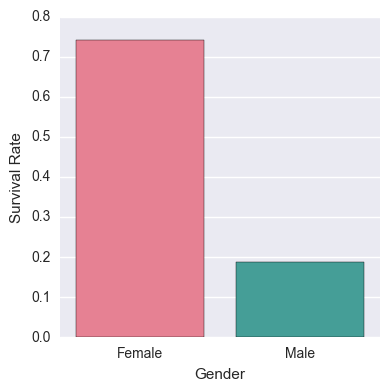

In [5]:
# 1a Overal Survival Rate by Gender
g = sns.factorplot(x='Sex',y='Survived', data=df,kind='bar',ci=None, order=['female','male'],palette='husl')
g.set_xlabels('Gender')
g.set_xticklabels(['Female','Male'])
g.set_ylabels('Survival Rate')

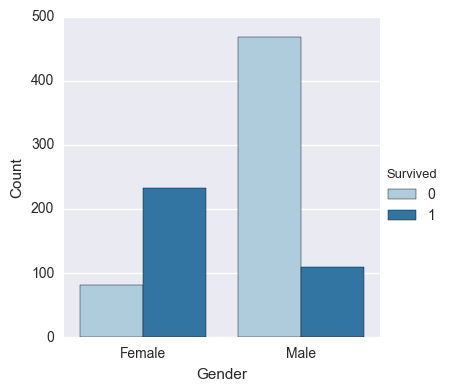

In [6]:
# 1b Survival Count by Gender
gender=df.groupby(['Survived','Sex']).size().reset_index()
gender.columns.values[2]='Count'

g = sns.factorplot(x='Sex', y='Count', hue='Survived',data=gender, kind='bar', palette='Paired')
g.set_xticklabels(['Female','Male'])
g.set_xlabels('Gender')
g.set_ylabels('Count')

Both surivial percentage and absolute number count show that female group has better survival chance.

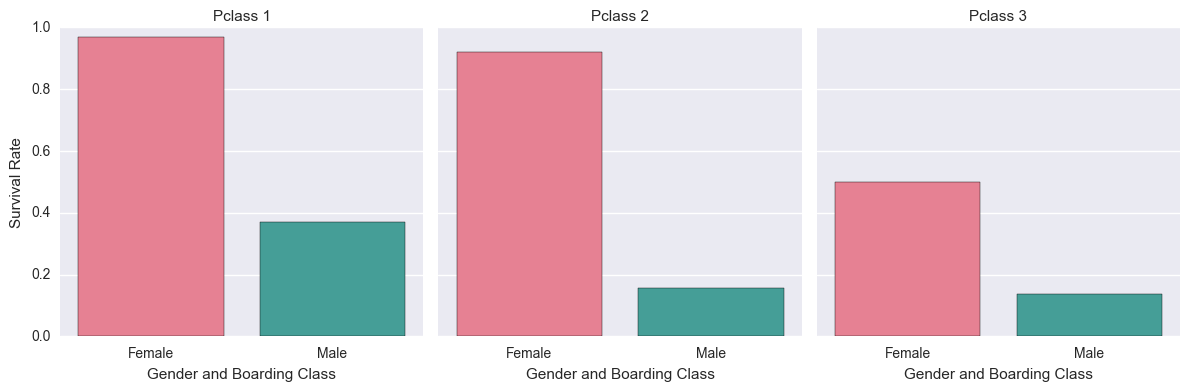

In [7]:
# 1c Survival Rate by Gender and Boarding Class

g = sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df,kind='bar',order=['female','male'], ci=None, palette='husl')
g.set_axis_labels('Gender and Boarding Class')
g.set_titles("{col_var} {col_name}")
g.set_xticklabels(['Female','Male'])
g.set_ylabels('Survival Rate')

By breaking down to each boarding class, we can see female overall does have higher survival rate, though the gender advantage shrinked from First Class to Third Class. Maybe "Die like a gentleman" is more prevalence in higher class.

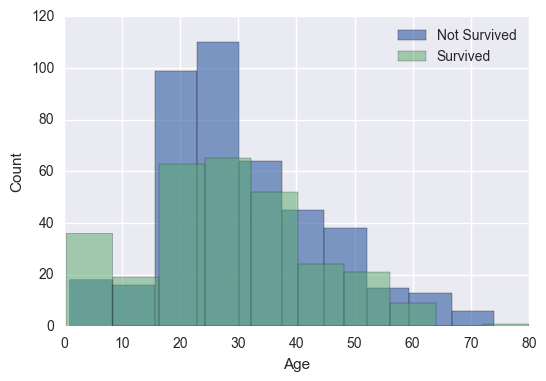

In [8]:
# 1d Compare Survival by Age group
df_age = df[np.isfinite(df['Age'])]
plt.hist(df_age[df_age["Survived"]==0]["Age"].reset_index(drop=True), bins=10, alpha=0.7, label="Not Survived")
plt.hist(df_age[df_age["Survived"]==1]["Age"].reset_index(drop=True), bins=10, alpha=0.5, label="Survived")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

More than half of children under age 15 are survived, while less than half old people (assuming age>60) did not see this trend. However, it is probably not because old people don't get same respect or given priority to board safety boat, it is more likely due to the factor old people themselves would willing to give up the opportunity to children and women.

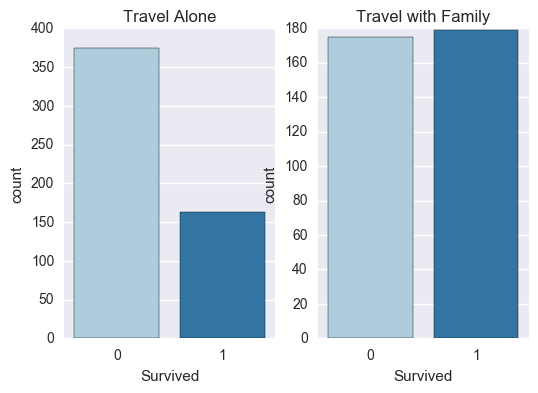

In [9]:
# 1e. Compare Survival by "Travel Alone vs Travel with Family"
df_alone=df[(df.SibSp==0)&(df.Parch==0)]
df_family=df[(df.SibSp>0)|(df.Parch>0)]

fig, (ax1,ax2) =plt.subplots(ncols=2,sharex=True)

sns.countplot(x='Survived', data=df_alone, ax=ax1, palette='Paired')
sns.countplot(x='Survived', data=df_family, ax=ax2, palette='Paired')
ax1.title.set_text('Travel Alone')
ax2.title.set_text('Travel with Family')


It seems that travel with family is more likely to survive than travel alone.

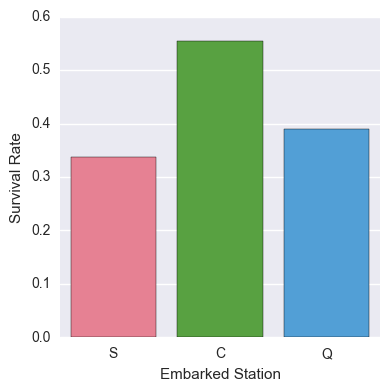

In [10]:
# 1f. Compare Survival Rate Among Embarked Stations
# Drop missing values in Embarked data
dta = df.dropna(subset =['Embarked'])
g = sns.factorplot(x='Embarked',y='Survived', data=df,kind='bar',ci=None,palette='husl')
g.set_xlabels('Embarked Station')
g.set_ylabels('Survival Rate')

The embark station categorized as "C" seems have higher survive rate comparing with other two stations, which makes me wonder where are these three stations located. Is station C have more higher class level passengers or more female passengers?

### Question 2: 
**2a. What are the three embark stations located?**

**2b. What's the boarding class distribution among these stations?**

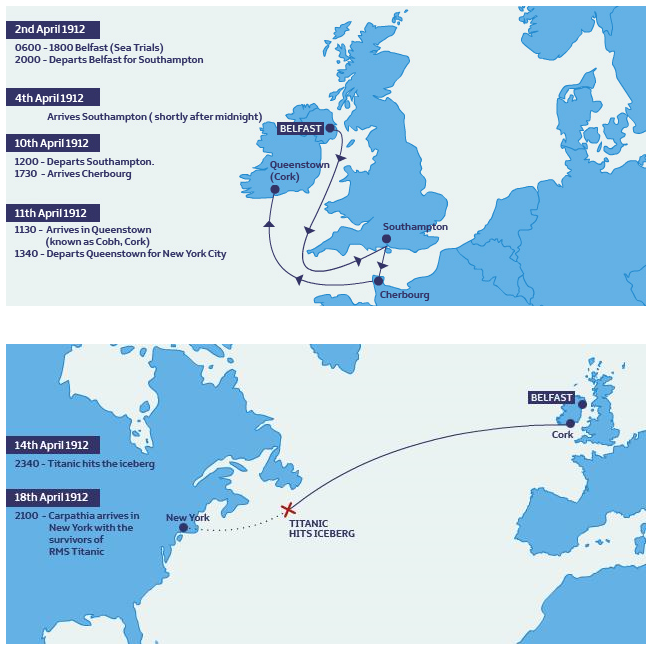

In [11]:
# 2a: Where are the 3 embark stations located?
from IPython.display import Image
Image(filename='Titanic_Route_Map.png')

**In relation to our dataset**
1. **10th April, noon**: Titanic departs **Southampton, England**,which means that the people with "Embarked=S" aboarded first
2. **10th April, 17:30**: Titanic arrives in **Cherbourg,France** where John Jacob Astor (Titanic's richest passenger) and his 18 years old wife Madeleine on board. Our data shows that people boarded at Cherbourg (Embarked="C")did have higher survival rate compared to other two stations. The next step is to see further exam the Pclass composition.
3. **11th April, 13:30**: Titanic departs **Queestown, Ireland** for New York City
4. **15th April, 02:20**: Titanic begins to sink. Some believed that most people were sleeping is another reason of the tragedy loss.

-- [Image Source](https://www.discovernorthernireland.com/titanic/Titanic-Route-Map-A2196) --

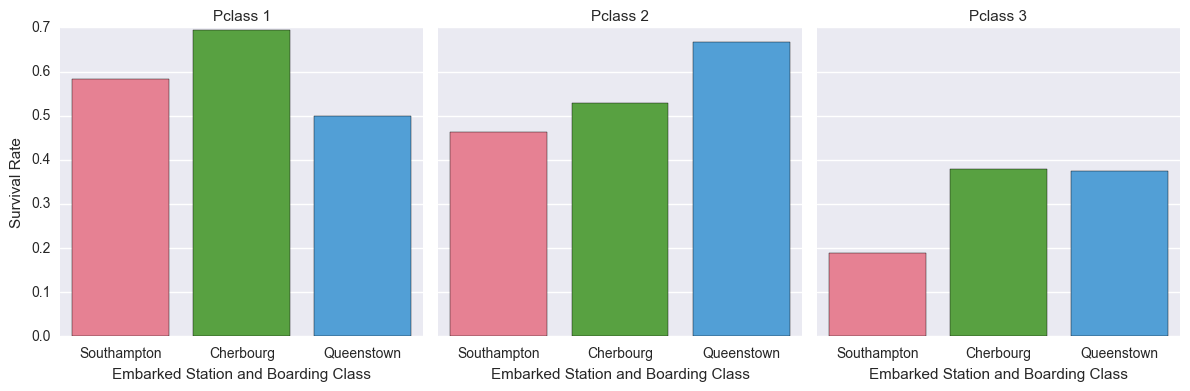

In [12]:
#2b. What's the Pclass distribution among these stations?

g = sns.factorplot(x='Embarked',y='Survived',col='Pclass',data=dta,kind='bar',ci=None, palette='husl')
g.set_axis_labels('Embarked Station and Boarding Class')
g.set_titles("{col_var} {col_name}")
g.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
g.set_ylabels('Survival Rate')

It is true that Cherboug stations with the most wealthy passengers.

### Question 3: What is the pricing patterns of Titanic, specifically the relationship between Pclass and Fare? 

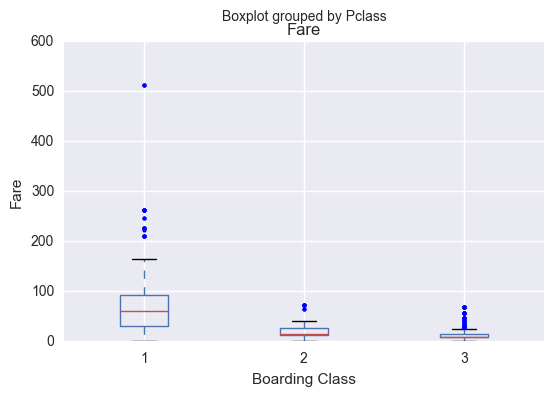

In [13]:
# Use boxplot to show the fare range by class, including outliers
df.boxplot('Fare', by='Pclass', sym='k.')
plt.xlabel('Boarding Class')
plt.ylabel('Fare')

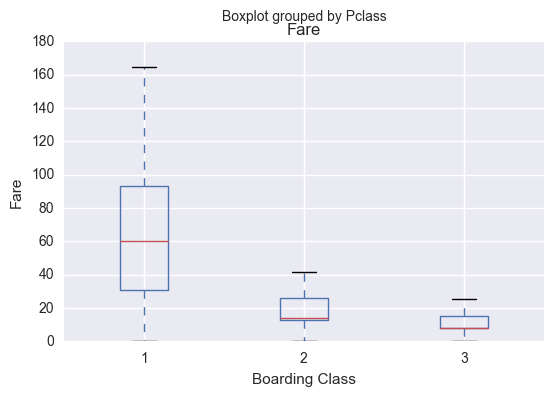

In [14]:
# A closer look for range between 0 and 180
df.boxplot('Fare', by='Pclass')
plt.ylim(0,180)
plt.xlabel('Boarding Class')
plt.ylabel('Fare')

It seems that fare is positively correlated to boarding class. One thing to be noticed that Fare with zero values can be found among all three classes.

The next step is to find out what's in common for those free tickets.

In [15]:
df_free=df[df.Fare==0]
df_free.describe(include=['O'])

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,15,15,15,15,15,15,3,15
unique,15,2,3,15,1,10,3,1
top,414,0,2,"Johnson, Mr. Alfred",male,LINE,A36,S
freq,1,14,6,1,15,4,1,15


It seems that people travel by free ticket are all male, and they all embarked at the same station. After googling the top name Cunningham, Mr.Alfred Fleming, The most frequent Ticket "LINE" belongs to crew member.

In [16]:
# Since there are only 15 records, print out all
df_free

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Another google results revealed that possible explanination for free ticket: Parr,Mr William Henry Marsh, was one of the employees chosen to oversee the Titanic's mainden voyage.

 # Step 3: Conclusion and Discussion
 
 ## Conclusion
 
After examing the Titanic dataset in varies aspects, now we can add more details to the below questions:
* What are the most prominant categorical factors correlated to survived passengers?
  - Pclass, Gender (strong correlated)
  - Age, Embarked Station (correlated)
  - Travel with family does improve the survive chance
* What are the three embark stations located? And what's the Pclass distribution among these stations?
  - The location can be refered to the Titanic Route Map
  - The higher survive rate observed at Embarked station Cherboug is likely due to the fairly large proportion of wealthy(Pclass=1) passengers
* What is the relationship between Pclass and Fare?
  - Though a small overlap can be observed among different Pclass levels, Fare is positively correlated to Pclass level: the higher the Pclass level, the higher the Fare.
  - There are 15 people traveled with free ticket, and most of them are crew.
  
  ## Discussion

There are some limitations of this study:
* Given the limited background on how the trainning data was created, for example, it is unclear whether the sample is randomly selected or intentionly designed this way, we don't know if it is an un-biaesd sample. However, the result can be used to construting further statistical hypothese: we can perform z-test to sample mean with population mean if the population data is provided or perform t-test if the population is unknown.
* Family size is not included to study the survival rate, which might provide import aspects predicting survival
* The structure of data representing peoples travel partners may be misleading. if the data can be arranged in a way that Spouse as one group, and Sibling+Parents+Children as the other group, it would provide better structure to understand questions like whether couples are likely to die together.

# Reference
### History Facts
[Encyclopedia Titanic](https://www.encyclopedia-titanica.org/titanic-victim/william-henry-marsh-parr.html)
### Blog
[Exploring Survival on the Titanic Dataset](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/discussion)
[Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier/discussion)
[中继点](http://zjdian.com/2014/09/17/2014-09-17-kaggle-titanic)
### Image
[Titanic Route Map](https://www.discovernorthernireland.com/titanic/Titanic-Route-Map-A2196)